# Writing data to and reading data from a Database using Python

## Libraries and settings

In [1]:
# Libraries
import os
import sqlite3
import fnmatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Create sqlite data base

In [2]:
# Get current working directory
print(os.getcwd())

# Create data base
conn = sqlite3.connect('apartment_database.db') 
cursor = conn.cursor()

# Show dbs in the directory
flist = fnmatch.filter(os.listdir('.'), '*.db')
for i in flist:
    print(i)

/workspaces/data_analytics/Week_02
apartment_database.db


## Create SQL-table in the database

In [3]:
cursor.execute('''CREATE TABLE IF NOT EXISTS apartments_table (OrderId VARCHAR(50),
                                                               Rooms DECIMAL(8,2),
                                                               Area INT(8),
                                                               Price DECIMAL(8,2))''')
# Confirm changes to the table
conn.commit()

## Read data from file to data frame

In [4]:
df = pd.read_csv('apartments_data_prepared.csv', 
                  sep=',', 
                  encoding='utf-8')[['web-scraper-order', 'rooms', 'area', 'price']]
print(df.shape)
df.head(5)

(1008, 4)


,web-scraper-order,rooms,area,price
0,1662023695-433,3.5,122.0,3180.0
1,1662023745-820,2.5,78.0,3760.0
2,1662023742-807,5.5,115.0,2860.0
3,1662023804-1290,3.5,74.0,2165.0
4,1662023739-771,5.5,195.0,6900.0


## Write data to the SQL-table in data base

In [5]:
df.to_sql(name = 'apartments_table',
          con = conn,
          index = False,
          if_exists = 'replace')

1008

## Query the SQL-table

In [6]:
# Query the SQL-table
cursor.execute('''SELECT *
               FROM apartments_table
               WHERE rooms <= 10
               AND area > 50''')

df = pd.DataFrame(cursor.fetchall(), 
                  columns=['OrderId','Rooms','Area','Price'])    
print(df)

             OrderId  Rooms   Area   Price
0     1662023695-433    3.5  122.0  3180.0
1     1662023745-820    2.5   78.0  3760.0
2     1662023742-807    5.5  115.0  2860.0
3    1662023804-1290    3.5   74.0  2165.0
4     1662023739-771    5.5  195.0  6900.0
..               ...    ...    ...     ...
821   1662023764-973    1.5   65.0  2470.0
822   1662023739-792    3.5   70.0  1465.0
823   1662023745-835    2.5   56.0  1870.0
824  1662023783-1112    3.5   70.0  2190.0
825   1662023749-853    3.5   96.0  2260.0

[826 rows x 4 columns]


## Plot histogramm of rental prices

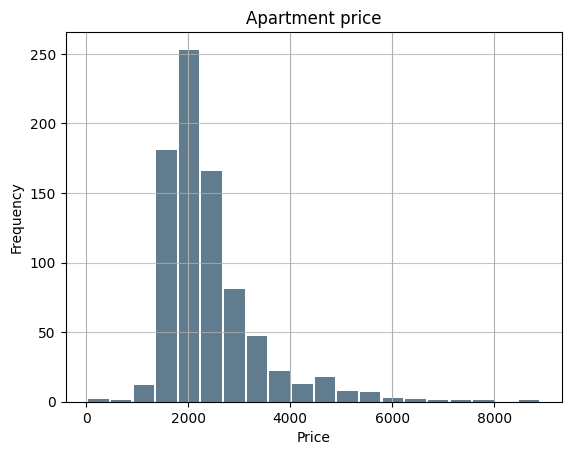

In [7]:
df.Price.plot.hist(grid=True, 
                   bins=20, 
                   rwidth=0.9,
                   color='#607c8e')
plt.title('Apartment price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# conn.close()

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [8]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 5.15.0-1041-azure
Datetime: 2023-08-21 11:01:16
Python Version: 3.10.8
-----------------------------------
